In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NSerov/rdkit/denis/df_mismatches.csv', index_col=0)
data

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,siRNA sense GC content,siRNA antisense GC content,GC content,Tm,longest_complementary_region,longest_matching_region
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0,AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA,22,0.0,19.047619,22.222222,20.634921,59.278499,1,12
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429,71.321429,3,19
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429,71.321429,3,19
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905,71.809524,3,19
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905,71.809524,3,19


In [ ]:
sns.set(style="whitegrid")
def plot_complementary_region_distribution(df, name):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=False, sharey=False)

    x = 'longest_matching_region'
    # Гистограмма с KDE
    variable = df[x]
    sns.histplot(variable, kde=True, alpha=.5, bins=30, binwidth=1, ax=ax)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=23)
    ax.legend()

    # Установка целочисленных делений на оси X и только четные метки
    min_val = int(variable.min())
    max_val = int(variable.max())
    xticks = np.arange(min_val, max_val + 1)
    even_xticks = xticks[xticks % 2 == 0]
    ax.set_xticks(even_xticks)
    ax.set_xticklabels(even_xticks)  # Устанавливаем метки оси X

    # Бокс-плот (inset) - top right
    ax_inset = plt.gca().inset_axes([0.0, 0.6, 0.34, 0.4])
    sns.boxplot(y=df[x], ax=ax_inset, boxprops=dict(alpha=.85))
    ax_inset.set_xlabel('', fontsize=17)
    ax_inset.set_ylabel(' ', fontsize=11)
    ax_inset.yaxis.tick_right()
    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=12)
    ax_inset.grid(False)

    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=12)
    ax_inset.set_title("")

    # Настройка меток оси Y для боксплота (только четные)
    ymin = int(df[x].min())
    ymax = int(df[x].max())
    yticks = np.arange(ymin, ymax + 1)
    even_yticks = yticks[yticks % 2 == 0]
    ax_inset.set_yticks(even_yticks)
    ax_inset.set_yticklabels(even_yticks)

    plt.title(f'')
    plt.xlabel('Complementary Region Length', fontsize=25)
    plt.ylabel('Frequency', fontsize=25)
    plt.savefig(f'{name}.png', dpi=1000, bbox_inches='tight')
    plt.show()

<ipython-input-38-c119ecf0e5e7>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-38-c119ecf0e5e7>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=12)
<ipython-input-38-c119ecf0e5e7>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=12)


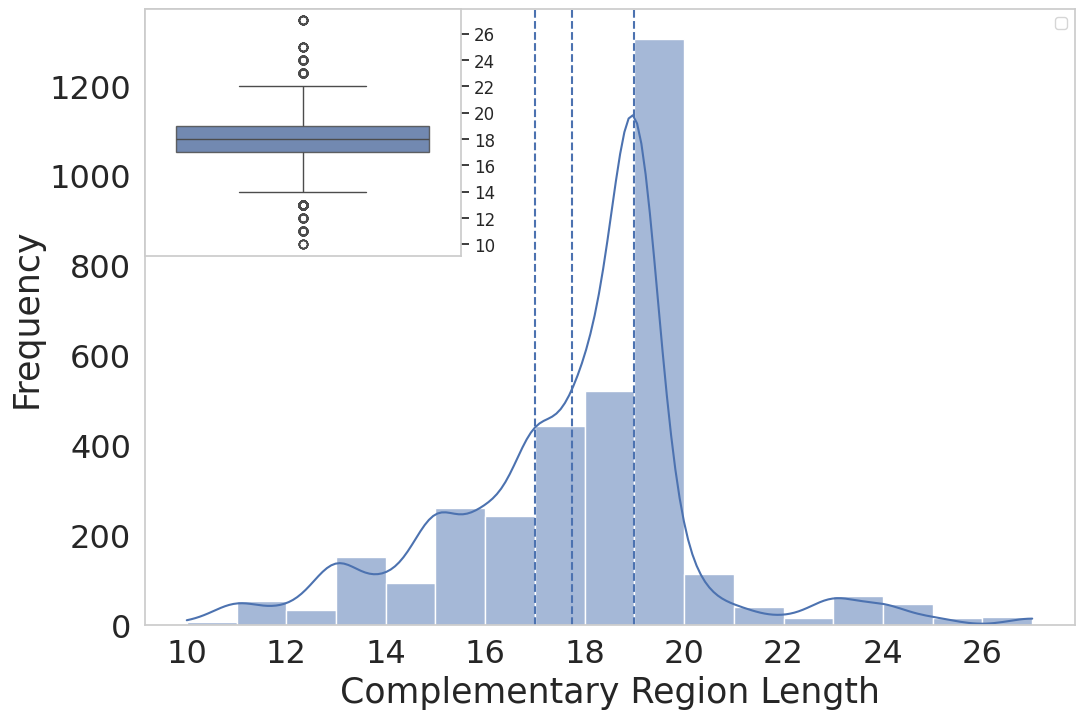

In [ ]:
plot_complementary_region_distribution(data, 'complementary.png')

In [ ]:
data['sense_length'] = data['siRNA sense'].apply(len)
data['antisense_length'] = data['siRNA antisense'].apply(len)
data

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,siRNA sense GC content,siRNA antisense GC content,GC content,Tm,longest_complementary_region,longest_matching_region,sense_length,antisense_length
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16,21,18
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0,AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA,22,0.0,19.047619,22.222222,20.634921,59.278499,1,12,21,18
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16,21,18
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16,21,18
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317,1,16,21,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429,71.321429,3,19,22,21
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429,71.321429,3,19,22,21
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905,71.809524,3,19,21,21
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905,71.809524,3,19,21,21


In [ ]:
def min_column(data):
  """
  Функция добавляет в DataFrame столбец с наименьшим значением из двух заданных столбцов.

  Args:
    data: pd.DataFrame или np.ndarray. DataFrame должен содержать минимум 2 столбца.

  Returns:
    pd.DataFrame или np.ndarray: DataFrame или np.ndarray с добавленным
                                 столбцом (последним), содержащим минимум из первых
                                 двух столбцов.
  """

  if isinstance(data, pd.DataFrame):
      if data.shape[1] < 2:
          raise ValueError("DataFrame должен иметь минимум 2 столбца.")

      # Вычисляем минимум между первым и вторым столбцом (индексы 0 и 1)
      min_values = np.minimum(data.iloc[:, -1], data.iloc[:, -2])

      # Добавляем новый столбец в DataFrame
      data["min_of_cols"] = min_values

      return data

  elif isinstance(data, np.ndarray):
      if data.shape[1] < 2:
          raise ValueError("Массив должен иметь минимум 2 столбца.")

       # Вычисляем минимум между первым и вторым столбцом (индексы 0 и 1)
      min_values = np.minimum(data[:, 0], data[:, 1])

      # Добавляем новый столбец в массив
      data = np.hstack(data, min_values.reshape(-1, 1))

      return data

  else:
    raise TypeError("Функция принимает только DataFrame или NumPy array.")

In [ ]:
results = min_column(data)

In [ ]:
results['min_of_cols'].value_counts()

,count
min_of_cols,
21,2320
22,634
18,120
20,108
23,81
25,76
19,55
27,18
24,16


In [ ]:
results = results[results['min_of_cols'] > 25]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NSerov/Modif/final_data_before_getting_descriptors (2) - final_data_before_getting_descriptors (2).csv')
df

,SMDBid,Sense,AntiSense,"Concentration, nM",Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,Duration after transfection,"Efficacy, %"
0,SM5317,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(OC)C3"",...",10.0,19,38,11,19,24.0,40.77
1,SM5316,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...",10.0,19,38,11,19,24.0,42.17
2,SM5315,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10.0,19,38,11,19,24.0,44.11
3,SM5314,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10.0,19,38,11,19,24.0,65.16
4,SM5313,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10.0,19,38,11,19,24.0,60.40
...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,"[""Nc1nc2N(C3COC(CO)C(OP(=O)(O)OP(=O)(O)OP(=O)(...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.0,15,11,8,2,72.0,81.40
3431,SM0004,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.0,15,11,8,2,72.0,35.40
3432,SM0003,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.0,15,11,8,2,72.0,54.20
3433,SM0002,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.0,15,11,8,2,72.0,76.80


In [ ]:
pd.merge(results, df, on='SMDBid')

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,...,min_of_cols,Sense,AntiSense,"Concentration, nM",Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,Duration after transfection,"Efficacy, %"
0,SM4650,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27,0.000000,...,27,"[""CC(C)CCCC(C)C1CCC2C3CC=C4CC(O(C(=O)NCCOCCOCC...","[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",50.00,5,36,8,27,48.0,10.0
1,SM4642,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27,0.000000,...,27,"[""CC(C)CCCC(C)C1CCC2C3CC=C4CC(O(C(=O)NCCOCCOCC...","[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",600.00,5,36,8,27,48.0,45.0
2,SM4634,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27,0.000000,...,27,"[""CC(C)CCCC(C)C1CCC2C3CC=C4CC(O(C(=O)NCCOCCOCC...","[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.20,5,36,8,18,48.0,66.0
3,SM4626,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27,0.000000,...,27,"[""CC(C)CCCC(C)C1CCC2C3CC=C4CC(O(C(=O)NCCOCCOCC...","[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",1.00,5,36,8,18,48.0,83.0
4,SM3210,GCCAGACUUUGUUGGAUUUUGAAATT,AAUUUCAAAUCCAACAAAGUCUGGCUU,--GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,2,GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,26,7.692308,...,26,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.00,19,19,8,31,24.0,94.0
5,SM3209,GCCAGACUUUGUUGGAUUUUGAAATT,AAUUUCAAAUCCAACAAAGUCUGGCUU,--GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,2,GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,26,7.692308,...,26,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.00,19,19,8,31,24.0,95.0
6,SM3207,GCCAGACUUUGUUGGAUUUUGAAATT,AAUUUCAAAUCCAACAAAGUCUGGCUU,--GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,2,GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,26,7.692308,...,26,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",1.00,19,19,8,31,24.0,13.0
7,SM3206,GCCAGACUUUGUUGGAUUUUGAAATT,AAUUUCAAAUCCAACAAAGUCUGGCUU,--GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,2,GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,26,7.692308,...,26,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",1.00,19,19,8,31,24.0,90.0
8,SM3204,GCCAGACUUUGUUGGAUUUUGAAATT,AAUUUCAAAUCCAACAAAGUCUGGCUU,--GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,2,GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,26,7.692308,...,26,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",0.10,19,19,8,31,24.0,60.0
9,SM3203,GCCAGACUUUGUUGGAUUUUGAAATT,AAUUUCAAAUCCAACAAAGUCUGGCUU,--GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,2,GCCAGACUUUGUUGGAUUUUGAAATT,AAGCCAGACUUUGUUGGA-UUUGAAAUU,26,7.692308,...,26,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",0.10,19,19,8,31,24.0,73.0


In [ ]:
dt = pd.merge(results, df, on='SMDBid')
dt.shape

(24, 28)

In [ ]:
dt['Concentration, nM'].value_counts()

,count
"Concentration, nM",
1.00,7
50.00,5
1.56,4
10.00,2
0.10,2
2.00,2
600.00,1
0.20,1


In [ ]:
dt[dt['Efficacy, %'] < 50]['Concentration, nM'].value_counts()

,count
"Concentration, nM",
50.0,3
600.0,1
1.0,1
2.0,1
